In [19]:
import random
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

## 1. _k_-means on a Randomly Generated Dataset

In [3]:
x1 = [-4.9, -3.5, 0, -4.5, -3, -1, -1.2, -4.5, -1.5, -4.5, -1, -2, -2.5, -2, -1.5, 4, 1.8, 2, 2.5, 3, 4, 2.25, 1, 0, 1, 2.5, 5, 2.8, 2, 2]
x2 = [-3.5, -4, -3.5, -3, -2.9, -3, -2.6, -2.1, 0, -0.5, -0.8, -0.8, -1.5, -1.75, -1.75, 0, 0.8, 0.9, 1, 1, 1, 1.75, 2, 2.5, 2.5, 2.5, 2.5, 3, 6, 6.5]



In [4]:
# Define a function that assigns each datapoint to a cluster
colors_map = np.array(['b', 'r'])
def assign_members(x1, x2, centers):
    compare_to_first_center = np.sqrt(np.square(np.array(x1) - centers[0][0]) + np.square(np.array(x2) - centers[0][1]))
    compare_to_second_center = np.sqrt(np.square(np.array(x1) - centers[1][0]) + np.square(np.array(x2) - centers[1][1]))
    class_of_points = compare_to_first_center > compare_to_second_center
    colors = colors_map[class_of_points + 1 - 1]
    return colors, class_of_points

print('assign_members function defined!')

assign_members function defined!


In [5]:
# Define a function that updates the centroid of each cluster

def update_centers(x1, x2, class_of_points):
    center1 = [np.mean(np.array(x1)[~class_of_points]), np.mean(np.array(x2)[~class_of_points])]
    center2 = [np.mean(np.array(x1)[class_of_points]), np.mean(np.array(x2)[class_of_points])]
    return [center1, center2]

print('assign_members function defined!')

assign_members function defined!


In [6]:
# Define a function that plots the data points along with the cluster centroids
def plot_points(centroids=None, colors='g', figure_title=None):
    # plot the figure
    fig = plt.figure(figsize=(15, 10))  # create a figure object
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(x1, x2, s=500, c=colors)
    
    # define the ticks
    xticks = np.linspace(-6, 8, 15, endpoint=True)
    yticks = np.linspace(-6, 6, 13, endpoint=True)

    # fix the horizontal axis
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    # add tick labels
    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    # style the ticks
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    # add labels to axes
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)
    
    # add title to figure
    ax.set_title(figure_title, fontsize=24)

    plt.show()

print('plot_points function defined!')

plot_points function defined!


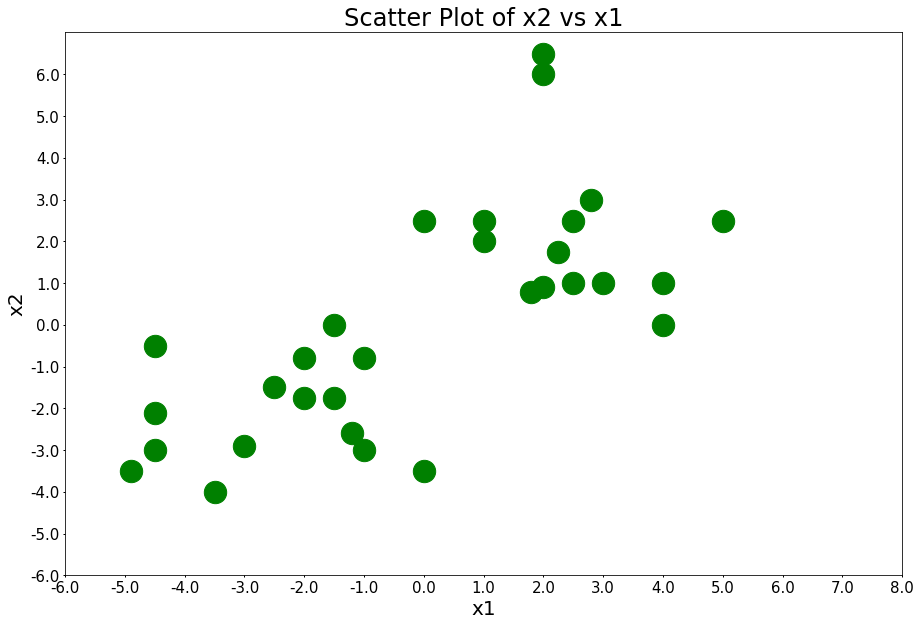

In [7]:
plot_points(figure_title='Scatter Plot of x2 vs x1')

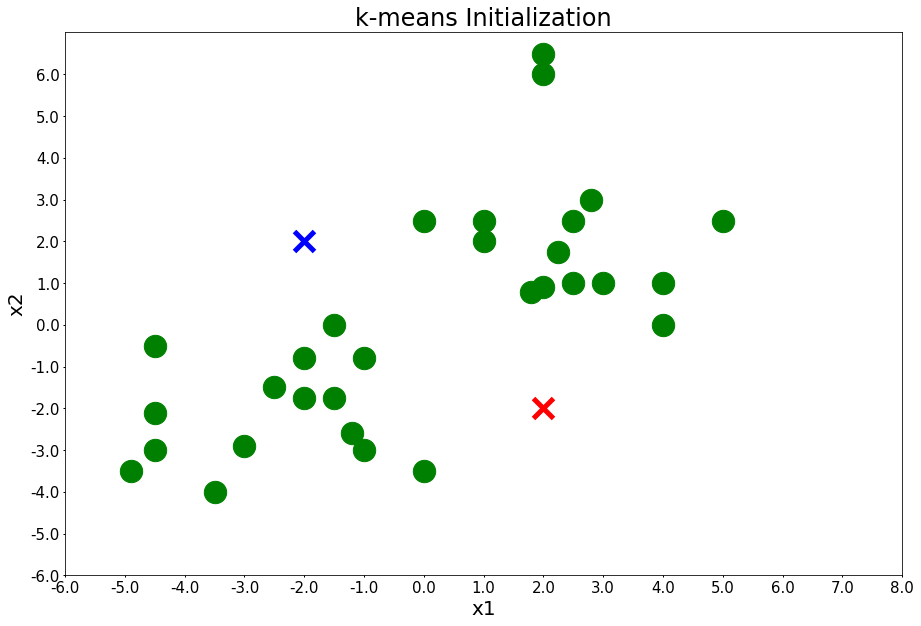

In [8]:
centers = [[-2, 2], [2, -2]]
plot_points(centers, figure_title='k-means Initialization')

Iteration 1 - Press Enter to update the members of each cluster3


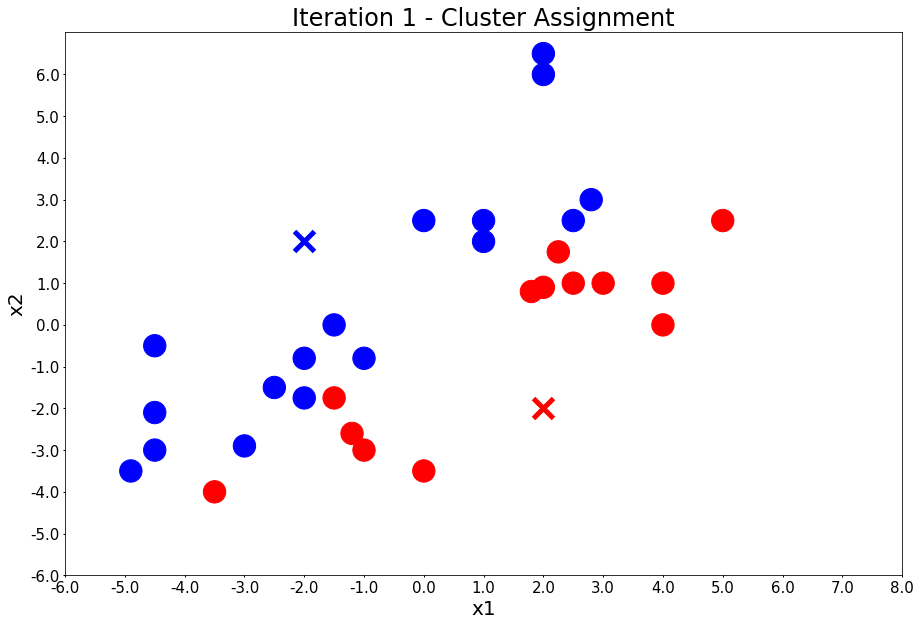

In [ ]:
number_of_iterations = 4
for i in range(number_of_iterations):
    input('Iteration {} - Press Enter to update the members of each cluster'.format(i + 1))
    colors, class_of_points = assign_members(x1, x2, centers)
    title = 'Iteration {} - Cluster Assignment'.format(i + 1)
    plot_points(centers, colors, figure_title=title)
    input('Iteration {} - Press Enter to update the centers'.format(i + 1))
    centers = update_centers(x1, x2, class_of_points)
    title = 'Iteration {} - Centroid Update'.format(i + 1)
    plot_points(centers, colors, figure_title=title)

# Generating the Data

np.random.seed(0) makes the random numbers predictable

i/p: numpy.random.seed(0) ; numpy.random.rand(4)

o/p: array([ 0.55,  0.72,  0.6 ,  0.54])

i/p:numpy.random.seed(0) ; numpy.random.rand(4)

o/p:array([ 0.55,  0.72,  0.6 ,  0.54])

With the seed reset (every time), the same set of numbers will appear every time.

np.random.seed(0)

Next we will be making random clusters of points by using the make_blobs class. The make_blobs class can take in many inputs, but we will use these specific ones.

Input

    n_samples: The total number of points equally divided among clusters.
        Value will be: 5000
    centers: The number of centers to generate, or the fixed center locations.
        Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]]
    cluster_std: The standard deviation of the clusters.
        Value will be: 0.9

Output

    X: Array of shape [n_samples, n_features]. (Feature Matrix)
        The generated samples.
    y: Array of shape [n_samples]. (Response Vector)
        The integer labels for cluster membership of each sample.



In [20]:
np.random.seed(0)

X, y = make_blobs(n_samples=500, centers=[[4, 4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

In [21]:
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)

In [25]:
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_labels

array([3, 2, 0, 0, 2, 0, 3, 1, 3, 1, 3, 2, 2, 3, 0, 0, 2, 1, 1, 2, 2, 2,
       1, 1, 0, 3, 2, 3, 2, 1, 2, 0, 2, 1, 0, 0, 2, 2, 1, 1, 2, 1, 3, 2,
       3, 1, 2, 0, 0, 1, 1, 2, 2, 0, 2, 1, 0, 0, 0, 3, 1, 0, 2, 2, 1, 0,
       3, 3, 1, 1, 3, 0, 1, 0, 2, 0, 3, 1, 0, 0, 2, 2, 2, 1, 0, 3, 3, 0,
       0, 1, 3, 0, 2, 1, 0, 2, 0, 1, 1, 3, 1, 1, 1, 1, 0, 0, 3, 3, 2, 3,
       1, 1, 2, 1, 3, 1, 1, 2, 0, 0, 2, 0, 1, 0, 0, 1, 1, 3, 1, 0, 2, 2,
       0, 3, 1, 2, 1, 2, 3, 3, 3, 0, 2, 2, 0, 0, 3, 0, 2, 3, 3, 1, 1, 0,
       0, 2, 3, 2, 1, 1, 0, 0, 0, 2, 3, 1, 0, 3, 3, 1, 3, 3, 3, 2, 0, 2,
       1, 3, 2, 3, 3, 2, 1, 3, 2, 3, 1, 0, 0, 1, 0, 1, 1, 3, 2, 1, 1, 3,
       1, 3, 2, 1, 0, 1, 3, 1, 2, 2, 2, 3, 1, 0, 0, 1, 3, 0, 1, 1, 2, 0,
       1, 2, 2, 3, 0, 0, 2, 1, 1, 1, 3, 1, 3, 3, 3, 2, 0, 1, 2, 1, 0, 1,
       2, 1, 3, 0, 1, 1, 0, 1, 2, 2, 3, 2, 0, 2, 1, 0, 1, 0, 3, 3, 3, 2,
       0, 0, 2, 0, 3, 0, 3, 1, 0, 2, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 2, 1,
       0, 0, 1, 1, 3, 2, 2, 0, 2, 1, 3, 1, 3, 2, 2,

In [23]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 1.02032671,  0.99435673],
       [ 3.9941026 ,  4.06310266],
       [ 1.8221152 , -3.13397761],
       [-2.14789839, -1.06339975]])

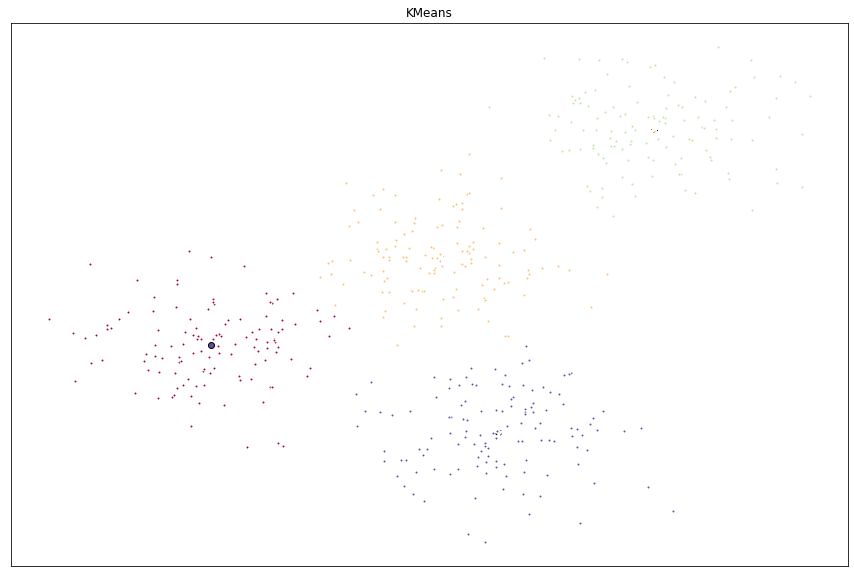

In [26]:
# initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(15, 10))

# colors uses a color map, which will produce an array of colors based on
# the number of labels. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# create a plot
ax = fig.add_subplot(1, 1, 1)

# loop through the data and plot the datapoints and centroids.
# k will range from 0-3, which will match the number of clusters in the dataset.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # create a list of all datapoints, where the datapoitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # plot the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# title of the plot
ax.set_title('KMeans')

# remove x-axis ticks
ax.set_xticks(())

# remove y-axis ticks
ax.set_yticks(())

# show the plot
plt.show()

## 2. Using _k_-means for Customer Segmentation


In [30]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/customer_segmentation.csv'
print('Data downloaded!')

Data downloaded!


In [31]:
customers_df = pd.read_csv(url)
customers_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [33]:
customers_df.drop(['Address'],axis=1,inplace=True)

In [58]:
len(customers_df)

850

In [52]:
from sklearn.preprocessing import StandardScaler

X = customers_df.values[:,1:]
X= np.nan_to_num(X)
cluster_dataset=StandardScaler().fit_transform(X)
len(cluster_dataset)

850

In [69]:
num_clusters=3

k_means = KMeans(init="k-means++", n_clusters=3, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(len(labels))

850


In [71]:
customers_df["Labels"] = labels
customers_df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Labels
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [73]:
customers_df.groupby('Labels').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Labels,,,,,,,,,
0,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578
1,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
2,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
